In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn.utils.fixes import loguniform
from scipy import stats
from sklearn.model_selection import ParameterSampler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from random import randint

In [2]:
dataset = pd.read_csv("loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [3]:
dataset

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106
...,...,...,...,...,...,...,...,...,...,...,...
1849,1,53400,228236.0,305514.0,6.0,0.0,0.0,11.148069,0.0,2.0,34.558417
1850,1,53600,235895.0,299772.0,5.0,0.0,0.0,112.748282,7.0,22.0,44.945929
1851,1,53600,208197.0,297280.0,4.0,1.0,1.0,160.485251,2.0,29.0,41.646731
1852,1,65500,205156.0,290239.0,2.0,0.0,0.0,98.808206,1.0,21.0,144.189001


## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

1. El conjunto de datos se trata de informacion sobre el rendimiento de prestamos realizados por un banco para automatizar la decision de aprobar o no los creditos..

2. Se busca predecir BAD la cual es una variable binaria indicando si el aplicante del credito va a devolver el credito o es un delincuente.

3. Atributos: todos los mismos son valores numericos. SON 12:
-Target: objetivo a predecir el cual es 1 si el cliente incumplio el prestamo o 0 si lo devolvio.
-Loan: monto de la solicitud del prestamo
-Mortdue: monto debido a la hipoteca existente
-Value: valor de la propiedad actualmente
-YOJ: cantidad de anos en el trabajo actual
-DEROG: Numero de informes despectivos
-DELINQ: numero de creditos impagos.
-CLAGE: Antigüedad de la línea comercial más antigua en meses
-NINQ: Número de líneas de crédito recientes
-CLNO:Número de líneas de crédito
-DEBTINC: Relación deuda-ingresos

4. Para la prediccion se cree que las variables mas relevantes podrian ser Loan, Derog, DEBTINC.

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [4]:
model = SGDClassifier(random_state=123)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print('Train error: ' , train_error.round(2))
print('Test error: ', test_error.round(2))
print('accuracy score ', accuracy_score(y_test,y_test_pred).round(2))
print('precision score ', precision_score(y_test,y_test_pred).round(2))
print('recall score ', recall_score(y_test,y_test_pred) .round(2))
print('f1 score ', f1_score(y_test,y_test_pred).round(2))

Train error:  0.17
Test error:  0.16
accuracy score  0.84
precision score  0.0
recall score  0.0
f1 score  0.0


/home/ariel/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
model.coef_

array([[ -4559.75247058, -15807.34188715,    489.48771352,
         -1576.28585877,    729.56039529,   1112.59674475,
        -42692.95026732,    852.12517035,   1468.12030204,
         11304.68254415]])

In [6]:
#pruebo escalando previamente los datos por recomendacion de la documentacion
model = make_pipeline(StandardScaler(), SGDClassifier(random_state=123))
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_error = mean_squared_error(y_train, y_train_pred)#tiene sentido esta variable?
test_error = mean_squared_error(y_test, y_test_pred)
print('Train error: ' , train_error.round(2))
print('Test error: ', test_error.round(2))
print('train accuracy score ', accuracy_score(y_train,y_train_pred).round(2))
print('test accuracy score ', accuracy_score(y_test,y_test_pred).round(2))
print('train precision score ', precision_score(y_train,y_train_pred).round(2))
print('test precision score ', precision_score(y_test,y_test_pred).round(2))
print('train recall score ', recall_score(y_train,y_train_pred) .round(2))
print('test recall score ', recall_score(y_test,y_test_pred) .round(2))
print('train f1 score ', f1_score(y_train,y_train_pred).round(2))
print('test f1 score ', f1_score(y_test,y_test_pred).round(2))




Train error:  0.15
Test error:  0.15
train accuracy score  0.85
test accuracy score  0.85
train precision score  0.58
test precision score  0.57
train recall score  0.33
test recall score  0.29
train f1 score  0.42
test f1 score  0.39


matriz de confusion train
[[1171   61]
 [ 167   84]]
matriz de confusion train


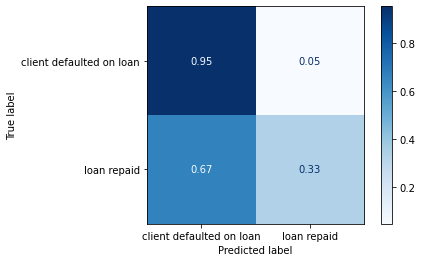

In [7]:
cm=confusion_matrix(y_train,y_train_pred)
print('matriz de confusion train')
print(cm)
tn, fp, fn, tp = confusion_matrix(y_train,y_train_pred).ravel()
print('matriz de confusion train')
plot_confusion_matrix(model.fit(X_train, y_train), X_train, y_train,
                                 display_labels=['client defaulted on loan','loan repaid'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')

matriz de confusion test
[[300  13]
 [ 41  17]]
matriz de confusion test


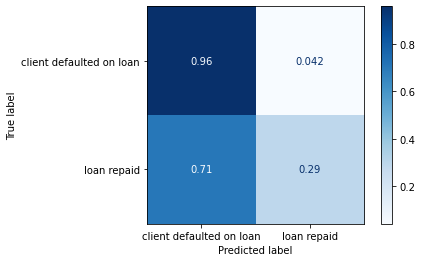

In [8]:
cm=confusion_matrix(y_test,y_test_pred)
print('matriz de confusion test')
print(cm)
tn, fp, fn, tp = confusion_matrix(y_test,y_test_pred).ravel()
print('matriz de confusion test')
plot_confusion_matrix(model.fit(X_train, y_train), X_test, y_test,
                                 display_labels=['client defaulted on loan','loan repaid'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [67]:
param_grid = {
    'loss': [ 'hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'learning_rate': ['optimal','constant','invscaling','adaptive'],
    'alpha':loguniform(1e-1, 1e2),
    'penalty':['l2', 'l1', 'elasticnet']
}

In [68]:
#tengo que escalar por separado
scaler=StandardScaler()
scaler.fit_transform(X)
model = SGDClassifier(random_state=0,eta0=1)

cv = RandomizedSearchCV(model, param_grid, n_iter=10, cv=3, random_state=0)
cv.fit(X_train, y_train);#aca no deberia ir X_train e y_train?

In [69]:
results = cv.cv_results_
df = pd.DataFrame(results)
df[['param_loss', 'param_alpha','param_penalty','param_learning_rate', 'mean_test_score', 
    'std_test_score', 'rank_test_score']]

,param_loss,param_alpha,param_penalty,param_learning_rate,mean_test_score,std_test_score,rank_test_score
0,hinge,4.43038,l1,constant,0.831424,0.001833,1
1,perceptron,7.42491,elasticnet,invscaling,0.610776,0.311648,9
2,modified_huber,0.147958,l1,optimal,0.777459,0.058172,8
3,hinge,23.7233,l1,adaptive,0.788913,0.058291,7
4,hinge,59.8122,l1,constant,0.828055,0.004207,4
5,squared_hinge,8.80067,l1,optimal,0.828724,0.003489,3
6,hinge,21.6008,elasticnet,adaptive,0.830749,0.000884,2
7,squared_hinge,2.63526,l1,constant,0.828055,0.004207,4
8,hinge,21.9577,l1,invscaling,0.827382,0.005144,6
9,hinge,0.269191,elasticnet,adaptive,0.310233,0.158138,10


In [108]:
#utilizo el mejor rankeado
model = make_pipeline(StandardScaler(), 
                      SGDClassifier(loss='hinge',alpha=4.43,penalty='l1',learning_rate='constant',eta0=1,
                                    random_state=0))
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print('Train error: ' , train_error.round(2))
print('Test error: ', test_error.round(2))
print('train accuracy score ', accuracy_score(y_train,y_train_pred).round(2))
print('test accuracy score ', accuracy_score(y_test,y_test_pred).round(2))
print('train precision score ', precision_score(y_train,y_train_pred).round(2))
print('test precision score ', precision_score(y_test,y_test_pred).round(2))
print('train recall score ', recall_score(y_train,y_train_pred) .round(2))
print('test recall score ', recall_score(y_test,y_test_pred) .round(2))
print('train f1 score ', f1_score(y_train,y_train_pred).round(2))
print('test f1 score ', f1_score(y_test,y_test_pred).round(2))
#esta overfitteando?

Train error:  0.17
Test error:  0.16
train accuracy score  0.83
test accuracy score  0.84
train precision score  0.0
test precision score  0.0
train recall score  0.0
test recall score  0.0
train f1 score  0.0
test f1 score  0.0


/home/ariel/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


matriz de confusion train
[[1232    0]
 [ 251    0]]
matriz de confusion train


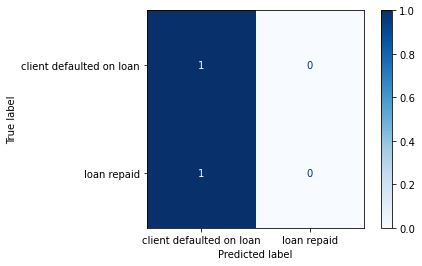

In [71]:
cm=confusion_matrix(y_train,y_train_pred)
print('matriz de confusion train')
print(cm)
tn, fp, fn, tp = confusion_matrix(y_train,y_train_pred).ravel()
print('matriz de confusion train')
plot_confusion_matrix(model.fit(X_train, y_train), X_train, y_train,
                                 display_labels=['client defaulted on loan','loan repaid'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')

matriz de confusion test
[[313   0]
 [ 58   0]]
matriz de confusion test


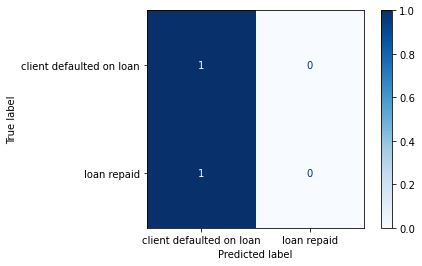

In [72]:
cm=confusion_matrix(y_test,y_test_pred)
print('matriz de confusion test')
print(cm)
tn, fp, fn, tp = confusion_matrix(y_test,y_test_pred).ravel()
print('matriz de confusion test')
plot_confusion_matrix(model.fit(X_train, y_train), X_test, y_test,
                                 display_labels=['client defaulted on loan','loan repaid'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [61]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print('Train error: ' , train_error.round(2))
print('Test error: ', test_error.round(2))
print('train accuracy score ', accuracy_score(y_train,y_train_pred).round(2))
print('test accuracy score ', accuracy_score(y_test,y_test_pred).round(2))
print('train precision score ', precision_score(y_train,y_train_pred).round(2))
print('test precision score ', precision_score(y_test,y_test_pred).round(2))
print('train recall score ', recall_score(y_train,y_train_pred) .round(2))
print('test recall score ', recall_score(y_test,y_test_pred) .round(2))
print('train f1 score ', f1_score(y_train,y_train_pred).round(2))
print('test f1 score ', f1_score(y_test,y_test_pred).round(2))


Train error:  0.0
Test error:  0.12
train accuracy score  1.0
test accuracy score  0.88
train precision score  1.0
test precision score  0.62
train recall score  1.0
test recall score  0.64
train f1 score  1.0
test f1 score  0.63


matriz de confusion train
[[1232    0]
 [   0  251]]
matriz de confusion train


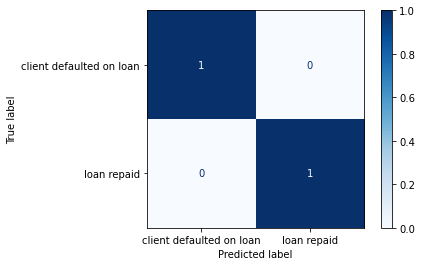

In [62]:
cm=confusion_matrix(y_train,y_train_pred)
print('matriz de confusion train')
print(cm)
tn, fp, fn, tp = confusion_matrix(y_train,y_train_pred).ravel()
print('matriz de confusion train')
plot_confusion_matrix(model.fit(X_train, y_train), X_train, y_train,
                                 display_labels=['client defaulted on loan','loan repaid'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')

matriz de confusion test
[[290  23]
 [ 21  37]]
matriz de confusion test


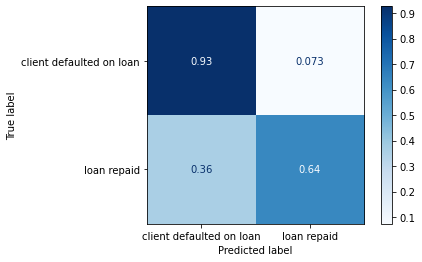

In [63]:
cm=confusion_matrix(y_test,y_test_pred)
print('matriz de confusion test')
print(cm)
tn, fp, fn, tp = confusion_matrix(y_test,y_test_pred).ravel()
print('matriz de confusion test')
plot_confusion_matrix(model.fit(X_train, y_train), X_test, y_test,
                                 display_labels=['client defaulted on loan','loan repaid'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')

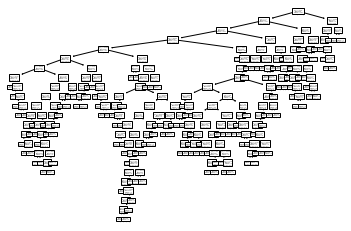

In [64]:
plot_tree(model);

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [97]:
param_grid = {
    'criterion': [ 'gini', 'entropy'],
    'max_depth': [4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11,12]
}

In [98]:
model = DecisionTreeClassifier(random_state=0)

cv = RandomizedSearchCV(model, param_grid, n_iter=10, cv=3, random_state=0)
cv.fit(X_train, y_train);#aca no deberia ir X_train e y_train?

In [99]:
results = cv.cv_results_
df = pd.DataFrame(results)
df[['param_criterion', 'param_max_depth','param_min_samples_leaf', 'mean_test_score', 
    'std_test_score', 'rank_test_score']]

,param_criterion,param_max_depth,param_min_samples_leaf,mean_test_score,std_test_score,rank_test_score
0,entropy,5,10,0.863135,0.021164,4
1,gini,14,5,0.859743,0.004177,7
2,gini,20,11,0.868518,0.008451,2
3,gini,8,5,0.875256,0.003321,1
4,entropy,8,11,0.863136,0.022345,3
5,entropy,15,5,0.852364,0.040021,10
6,entropy,13,9,0.859090,0.022034,8
7,gini,19,9,0.861778,0.012695,5
8,entropy,11,3,0.861125,0.034661,6
9,entropy,12,7,0.858415,0.021323,9


In [102]:
#utilizo el mejor rankeado
model =  DecisionTreeClassifier(criterion='gini',max_depth=8,min_samples_leaf=5,random_state=0)
                            
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print('Train error: ' , train_error.round(2))
print('Test error: ', test_error.round(2))
print('train accuracy score ', accuracy_score(y_train,y_train_pred).round(2))
print('test accuracy score ', accuracy_score(y_test,y_test_pred).round(2))
print('train precision score ', precision_score(y_train,y_train_pred).round(2))
print('test precision score ', precision_score(y_test,y_test_pred).round(2))
print('train recall score ', recall_score(y_train,y_train_pred) .round(2))
print('test recall score ', recall_score(y_test,y_test_pred) .round(2))
print('train f1 score ', f1_score(y_train,y_train_pred).round(2))
print('test f1 score ', f1_score(y_test,y_test_pred).round(2))
#esta overfitteando?

Train error:  0.08
Test error:  0.13
train accuracy score  0.92
test accuracy score  0.87
train precision score  0.87
test precision score  0.6
train recall score  0.63
test recall score  0.5
train f1 score  0.73
test f1 score  0.55


matriz de confusion train
[[1208   24]
 [  93  158]]
matriz de confusion train


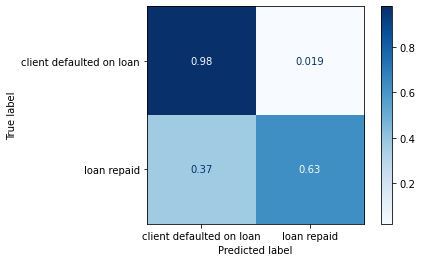

In [103]:
cm=confusion_matrix(y_train,y_train_pred)
print('matriz de confusion train')
print(cm)
tn, fp, fn, tp = confusion_matrix(y_train,y_train_pred).ravel()
print('matriz de confusion train')
plot_confusion_matrix(model.fit(X_train, y_train), X_train, y_train,
                                 display_labels=['client defaulted on loan','loan repaid'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')

matriz de confusion test
[[294  19]
 [ 29  29]]
matriz de confusion test


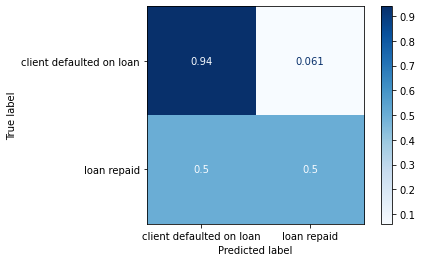

In [104]:
cm=confusion_matrix(y_test,y_test_pred)
print('matriz de confusion test')
print(cm)
tn, fp, fn, tp = confusion_matrix(y_test,y_test_pred).ravel()
print('matriz de confusion test')
plot_confusion_matrix(model.fit(X_train, y_train), X_test, y_test,
                                 display_labels=['client defaulted on loan','loan repaid'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')

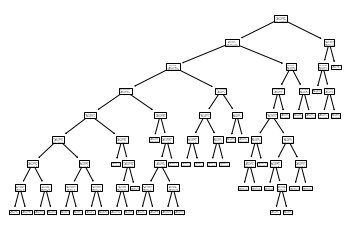

In [105]:
plot_tree(model);